Recall that We can generally enumarate 3 categories of participants as follows:

1. User/Watcher

2. Streamer

3. Company

In this notebook, we continue to conduct analysis on the role of `streamer`.

What streamer cares: 
1. money
2. the number of viewers/ a.k.a. traffic.

## Also, we start from the first-time streamer.

We do not talk about technical issues like how to streamer here, rather we discuss about how to gather viewer.

## Question1: What content is a better choice for this streamer.

This is a realistic question if this streamer wants to stream for making his living.

There are four quadrants if we consider 2 variables : money and traffic.

1. more money/ high volume of traffic
2. more money/ low volume of traffic
3. less money/ high volume of traffic
4. less money/ low volume of traffic

As a new streamer, which type can be the better choice?

This is a conceptual analysis, so we assume that the streamer can somehow get the data, directly or through the company.

It is possible that in each type of stream there are several streamer can earn much money and high volume of traffic,\
but we take a general view of whole type of stream.

Assume that there are 4 types of stream with each statistics: 

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({
    'Type':[1,2,3,4] , 'AvgDonateRank' :[1,2,3,4], 'AvgViewerRank' : [1,3,2,4] 
})
# For simplicity, we call all types of earnings as 「donate」

In [3]:
df

,Type,AvgDonateRank,AvgViewerRank
0,1,1,1
1,2,2,3
2,3,3,2
3,4,4,4


It seems that we can jump into the type 1 and prepare for the stream, right?

But if the reality is:

In [4]:
df_streamer = pd.DataFrame({
    'StreamType': [1,1,1,2,2,2,2,2,3,3,3,3,4,4]
})


In [5]:
df_streamer

,StreamType
0,1
1,1
2,1
3,2
4,2
5,2
6,2
7,2
8,3
9,3


In [6]:
df_streamer['StreamerID'] = range(1,15)

In [7]:
df_streamer['Donate'] = [1000000,20000,20000,100000,70000,45000,30000,50000,100000,50000,20000,15000,40000,30000]
df_streamer['Viewer'] = [100000,500,1000,70000,35000,10000,8000,5000,40000,10000,5000,4000,2000,1500]

In [8]:
df_streamer.groupby(by = 'StreamType')['Donate'].mean()

StreamType
1    346666.666667
2     59000.000000
3     46250.000000
4     35000.000000
Name: Donate, dtype: float64

In [9]:
df_streamer.groupby(by = 'StreamType')['Viewer'].mean()

StreamType
1    33833.333333
2    25600.000000
3    14750.000000
4     1750.000000
Name: Viewer, dtype: float64

This shows that

* Although Type1 has the most higher average donate and viewer, but other streamer of type1 is not different from the type4.
* Exclude StreamerID = 1, maybe type2 is the better choice.

## How could this happen?

Ans: Variance

In [10]:
df_streamer.groupby(by = 'StreamType')['Donate'].var()

StreamType
1    3.201333e+11
2    7.300000e+08
3    1.522917e+09
4    5.000000e+07
Name: Donate, dtype: float64

In [11]:
df_streamer.groupby(by = 'StreamType')['Viewer'].var()

StreamType
1    3.283583e+09
2    7.593000e+08
3    2.902500e+08
4    1.250000e+05
Name: Viewer, dtype: float64

So, we can not simply look at the average value of donate and viewer.

## More General Data:

Now we assume we have 100 streamers with # of Type1 = 50; # of Type2 = 30; # of Type3 = 15 and # of Type4 = 5

In [12]:
type1num = 50
type2num = 30
type3num = 15
type4num = 5
arr = np.array([1] * type1num + [2] * type2num + [3] * type3num + [4] * type4num)

In [13]:
np.random.shuffle(arr)

In [14]:
arr

array([1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 2, 1, 4,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 3, 4, 2, 1, 2, 4, 1, 3, 1, 2, 1, 1, 1, 3, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2,
       4, 1, 3, 1, 2, 1, 3, 2, 2, 3, 3, 4])

Since donate and viewer numbers may be right-skewed, we construct a right-skewed-like data.

In [15]:
df = pd.DataFrame()

In [16]:
df['StreamType'] = arr

In [17]:
df['StreamerID'] = range(1,101)

In [18]:
df = df.sort_values(by = 'StreamType')

In [19]:
df

,StreamType,StreamerID
0,1,1
30,1,31
62,1,63
79,1,80
34,1,35
...,...,...
21,4,22
48,4,49
52,4,53
88,4,89


In [20]:
from scipy.stats import skewnorm

In [21]:
donate = skewnorm.rvs(2000, size=100)*20000

In [22]:
df['Donate/Month'] = donate

In [23]:
df

,StreamType,StreamerID,Donate/Month
0,1,1,5686.673667
30,1,31,25921.078365
62,1,63,10131.158175
79,1,80,15417.646929
34,1,35,5977.552841
...,...,...,...
21,4,22,26799.963261
48,4,49,4316.279807
52,4,53,16504.134080
88,4,89,11921.622333


In [24]:
viewer = skewnorm.rvs(2000, size=100)*1000

In [25]:
df['Viewer/Daily'] = viewer

In [26]:
df

,StreamType,StreamerID,Donate/Month,Viewer/Daily
0,1,1,5686.673667,753.374521
30,1,31,25921.078365,780.263905
62,1,63,10131.158175,1010.492305
79,1,80,15417.646929,1244.494376
34,1,35,5977.552841,2815.652434
...,...,...,...,...
21,4,22,26799.963261,53.838280
48,4,49,4316.279807,301.069748
52,4,53,16504.134080,1003.170632
88,4,89,11921.622333,162.599413


We give some analysis on this data.

In [27]:
df.groupby(by = 'StreamType')['Donate/Month'].describe()

,count,mean,std,min,25%,50%,75%,max
StreamType,,,,,,,,
1,50.0,15675.570899,11566.201615,1488.609750,7798.077751,11615.402311,19862.631410,49184.565532
2,30.0,17348.640610,12750.960541,748.282349,7120.192815,15999.478226,25794.684983,53146.255722
3,15.0,16652.411176,13722.834825,2176.447900,8539.230335,14544.968504,21162.854215,51309.634628
4,5.0,14114.675942,8320.919239,4316.279807,11031.380232,11921.622333,16504.134080,26799.963261


In [28]:
df.groupby(by = 'StreamType')['Viewer/Daily'].describe()

,count,mean,std,min,25%,50%,75%,max
StreamType,,,,,,,,
1,50.0,1050.203286,788.968174,30.793731,447.536277,847.769224,1428.646024,2839.498767
2,30.0,787.027674,585.728740,5.861060,373.124697,643.134380,1284.253571,2218.298144
3,15.0,771.751262,538.694802,0.978108,403.309406,632.685958,1049.815639,2159.490292
4,5.0,449.273045,401.161420,53.838280,162.599413,301.069748,725.687154,1003.170632


For a new streamer, I would recommend that we consider the following points:\
\
In the long run:
* stable donate and viewer

But note that, life may not wait you until you grow up, so we also need to look at the short period condition.\
\
For the long run, we care stability, but in the short period we care
* growing potential based on the top streamers. (even rapidly)
* extreme case of donate and viewer

For stability, we care about mean and variance about donate and viewers.\
Note that since how everyone measures risk is different from each other,\
for me I will look more about the difference between mean and std of this type and the highest mean and lowest std.

In [29]:
df_diff = pd.DataFrame(
df.groupby(by = 'StreamType')['Donate/Month'].mean()
)

In [30]:
df_diff.columns = ['Donate/Month_mean']

In [31]:
df_diff['Donate/Month_std'] = pd.DataFrame(
df.groupby(by = 'StreamType')['Donate/Month'].std()
)

In [32]:
df_diff['Viewer/Daily_mean'] = pd.DataFrame(
df.groupby(by = 'StreamType')['Viewer/Daily'].mean()
)

df_diff['Viewer/Daily_std'] = pd.DataFrame(
df.groupby(by = 'StreamType')['Viewer/Daily'].std()
)

In [33]:
df_diff

,Donate/Month_mean,Donate/Month_std,Viewer/Daily_mean,Viewer/Daily_std
StreamType,,,,
1,15675.570899,11566.201615,1050.203286,788.968174
2,17348.640610,12750.960541,787.027674,585.728740
3,16652.411176,13722.834825,771.751262,538.694802
4,14114.675942,8320.919239,449.273045,401.161420


In [34]:
df_diff['Donate_mean_diff'] = df_diff['Donate/Month_mean'].sub(df_diff['Donate/Month_mean'].max()).div(df_diff['Donate/Month_mean'])
df_diff['Donate_std_diff'] = df_diff['Donate/Month_std'].div(df_diff['Donate/Month_std'].min())-1

In [35]:
df_diff['Viewer_mean_diff'] = df_diff['Viewer/Daily_mean'].sub(df_diff['Viewer/Daily_mean'].max()).div(df_diff['Viewer/Daily_mean'])
df_diff['Viewer_std_diff'] = df_diff['Viewer/Daily_std'].div(df_diff['Viewer/Daily_std'].min())-1

In [36]:
df_diff

,Donate/Month_mean,Donate/Month_std,Viewer/Daily_mean,Viewer/Daily_std,Donate_mean_diff,Donate_std_diff,Viewer_mean_diff,Viewer_std_diff
StreamType,,,,,,,,
1,15675.570899,11566.201615,1050.203286,788.968174,-0.106731,0.390015,0.000000,0.966710
2,17348.640610,12750.960541,787.027674,585.728740,0.000000,0.532398,-0.334392,0.460082
3,16652.411176,13722.834825,771.751262,538.694802,-0.041810,0.649197,-0.360805,0.342838
4,14114.675942,8320.919239,449.273045,401.161420,-0.229121,0.000000,-1.337561,0.000000


For me, I prefer less Viewer_mean_diff and less Viewer_std_diff and \
moderate Donate_mean_diff and moderateDonate_std_diff.\
In this case, I will choose type1.

Next, we consider the short period.

There are 2 main aspects the new streamer may concern:
1. how bad would it be if I stream this type of content?
2. how successful would it be if I gradully growing my community?

For case1, we look at the worst case and the 25th percentile of donate and viewer.

In [44]:
df_low_high = pd.DataFrame(
df.groupby(by = 'StreamType')['Donate/Month'].quantile(0.25)
)

In [45]:
df_low_high.columns = ['Donate_25qtile']

In [49]:
df_low_high['Donate_75qtile'] = df.groupby(by = 'StreamType')['Donate/Month'].quantile(0.75)
df_low_high['Viewer_25qtile'] = df.groupby(by = 'StreamType')['Viewer/Daily'].quantile(0.25)
df_low_high['Viewer_75qtile'] = df.groupby(by = 'StreamType')['Viewer/Daily'].quantile(0.75)

In [50]:
df_low_high

,Donate_25qtile,Donate_75qtile,Viewer_25qtile,Viewer_75qtile
StreamType,,,,
1,7798.077751,19862.631410,447.536277,1428.646024
2,7120.192815,25794.684983,373.124697,1284.253571
3,8539.230335,21162.854215,403.309406,1049.815639
4,11031.380232,16504.134080,162.599413,725.687154


The donate floor : 4 > 3 > 1 > 2\
The donate ceiling : 2 > 3 > 1 > 4\
The viewer floor : 1 > 3 > 2 > 4\
The viewer ceiling : 1 > 2 > 3 > 4

In this case, type 3 can be a not bad start point \
since its 25th & 75th percentile donation have high rank, and\
its 25th percentile viewer numbers has high rank, and its 75th percentile viewer numbers has middle rank.

Until now, we help a new streamer find which type of stream he can start with.

## Next, we talk more about the existing streamers.

This part could be more complicated.

For popular streamers, they may care more about stability and consistency.\
But for less popular streamers, they may care not just stability but also growing chances.

In both cases, they need to analysis about their viewers and those of other streamers.

## Question: What can we analyze?

Ans: Engagement of Viewers

To be more specific, viewers have 3 basic types of behavior:
* Watch
* Chat
* Donate

For these behaviors, we have a more important variable: `time`.

Time format can be detailed as intraday HH-MM-SS or date with workdays or holidays.

Also, we care about how this outcome shifts as time moves on.

To make things simple, we discuss only about 3 time period with:
* Week with no holiday.
* Week with holiday.
* Week after holiday.

Similarly, the data is artificially generated. So, it may not meet the common sense.

We specify the encoding number of streamer scale which has average viewers :
* 0-200 : 1
* 200-500 : 2
* 500-1000: 3
* 1000-3000:4
* 3000 up : 5

We specify the daily donate scale which: 
* 0-1000 : 1
* 1000-3000 : 2
* 3000-5000 : 3
* 5000-10000 : 4
* 10000 up : 5

We specify the chat/sec scale which: 
* < 1 : 1
* 1-1.5 : 2
* 1.5-2 : 3
* 2-3 : 4
* 3 up : 5

We start from workday.

In [12]:
rng = np.random.default_rng(32)

In [3]:
df = pd.DataFrame(
{'StreamerID': range(1,101)}
)

In [5]:
arr = np.array([1] * 50 + [2] * 30 + [3] * 10 + [4] * 8 + [5] * 2)
np.random.shuffle(arr)

In [6]:
df['Scale'] = arr

In [9]:
arr_start = np.array(['Morning'] * 10 + ['Afternoon'] * 20 + ['Night'] * 50 + ['Midnight'] * 20)
np.random.shuffle(arr_start)

In [10]:
df['Start_Time'] = arr_start

In [13]:
df['Duration'] = rng.choice(12, 100, replace=True)+1

In [17]:
arr_donate = np.array([1] * 40 + [2] * 30 + [3] * 20 + [4] * 6 + [5] * 4)
np.random.shuffle(arr_donate)

In [18]:
df['Donate_Scale'] = arr_donate

In [20]:
arr_chat = np.array([1] * 30 + [2] * 30 + [3] * 25 + [4] * 10 + [5] * 5)
np.random.shuffle(arr_chat)

In [21]:
df['Chat/Sec'] = arr_chat

In [24]:
df.set_index('StreamerID')

,Scale,Start_Time,Duration,Donate_Scale,Chat/Sec
StreamerID,,,,,
1,1,Afternoon,11,2,1
2,1,Afternoon,2,3,5
3,2,Afternoon,11,2,3
4,1,Night,7,4,2
5,1,Afternoon,6,2,1
...,...,...,...,...,...
96,1,Midnight,4,2,3
97,1,Morning,6,1,3
98,4,Night,7,1,2


## What can we analyze with this data?

In [32]:
import matplotlib.pyplot as plt

In [51]:
df_cross = pd.crosstab(df['Scale'],df['Start_Time'])

In [56]:
df_cross

Start_Time,Afternoon,Midnight,Morning,Night
Scale,,,,
1,12,12,5,21
2,6,5,0,19
3,1,1,3,5
4,1,1,1,5
5,0,1,1,0


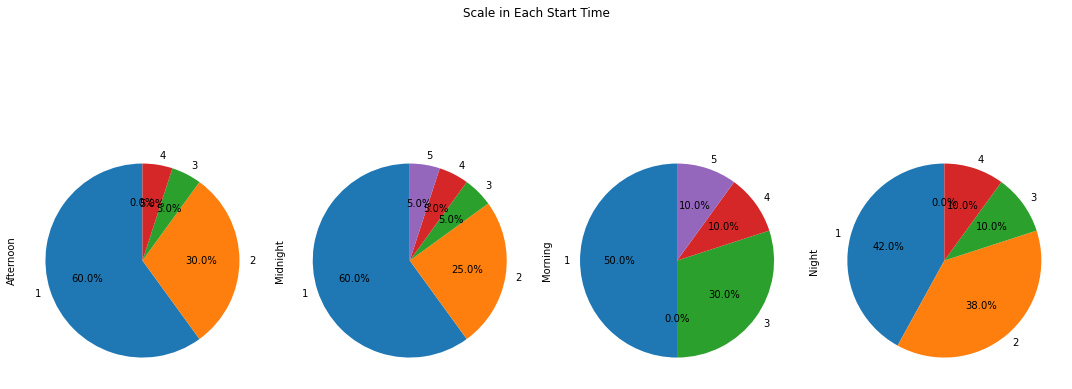

In [60]:
df_cross.plot(
    kind='pie',
    title="Scale in Each Start Time",
    figsize=(15, 7),
    legend = False,
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)
plt.tight_layout()
plt.show()

## Short Conclusion:
* In the morning, there are high percentage of large scale streamers (4-5).
* At night, there are lowest percentage of little scale streamers(1).
* At midnight and in the morning, there are lowest percentage of middle scale streamers(2-3).
* In the afternoon and at night, there are lowest percentage of largest scale streamers(5).

## Question: When do you choose to start stream?

1. For little scale streamers, they should keep away from the time when there are more large scale streamers.
    In this case, Afternnon and night is a better choice.

2. For middle scale streamers, they can choose to stream at the time when there are few middle or large scale streamers.
    In this case, Afternoon and midnight is a better choice.

3. For large scale streamers, they can ignore the time and choose to stream when there are most users using the stream app or website.

## Question: Does streaming longer bring more viewers?

In [61]:
pd.crosstab(df['Scale'],df['Duration'])

Duration,1,2,3,4,5,6,7,8,9,10,11,12
Scale,,,,,,,,,,,,
1,2,6,2,6,4,5,5,4,5,2,3,6
2,3,3,1,1,2,2,2,6,2,3,4,1
3,0,0,2,1,1,2,0,2,0,0,0,2
4,1,2,0,1,0,0,2,1,0,0,1,0
5,0,0,0,1,1,0,0,0,0,0,0,0


## Ans: In this data, no.

Since donate and chat/sec are more related to streamer type and hence not resonable to view them in a general view.

We next consider the time change of this data: 

* Add holiday data
* Add data after holiday.

## Why consider holiday?

Since there may be some users that only shows up in holiday and not in workdays, there may be fluctuate in each variable.\
And the most important part is **this fluctuation may be a 1-time event** and hence we can not view it as regular.

To make things simple, we assume that the start time of streams remain unchanged.

In [84]:
temp = np.array([1] * 40 + [2] * 25 + [3] * 20 + [4] * 10 + [5] * 5)
np.random.shuffle(temp)
df['Scale_holi'] = temp

temp = np.array([1] * 50 + [2] * 30 + [3] * 10 + [4] * 8 + [5] * 2)
np.random.shuffle(temp)
df['Scale_after_holi'] = temp

df['Duration_holi'] = rng.choice(12, 100, replace=True)+1
df['Duration_after_holi'] = rng.choice(12, 100, replace=True)+1

temp = np.array([1] * 30 + [2] * 20 + [3] * 30 + [4] * 12 + [5] * 8)
np.random.shuffle(temp)
df['Donate_Scale_holi'] = temp

temp = np.array([1] * 40 + [2] * 30 + [3] * 20 + [4] * 6 + [5] * 4)
np.random.shuffle(temp)
df['Donate_Scale_after_holi'] = temp

temp = np.array([1] * 30 + [2] * 20 + [3] * 35 + [4] * 10 + [5] * 5)
np.random.shuffle(temp)
df['Chat/Sec_holi'] = temp

temp = np.array([1] * 40 + [2] * 30 + [3] * 20 + [4] * 6 + [5] * 4)
np.random.shuffle(temp)
df['Chat/Sec_after_holi'] = temp

In [85]:
df

,StreamerID,Scale,Start_Time,Duration,Donate_Scale,Chat/Sec,Scale_holi,Scale_after_holi,Duration_holi,Duration_after_holi,Donate_Scale_holi,Donate_Scale_after_holi,Chat/Sec_holi,Chat/Sec_after_holi
0,1,1,Afternoon,11,2,1,2,1,8,3,1,3,1,2
1,2,1,Afternoon,2,3,5,3,3,3,6,4,3,3,2
2,3,2,Afternoon,11,2,3,1,1,3,2,5,1,2,1
3,4,1,Night,7,4,2,1,3,9,11,3,1,3,1
4,5,1,Afternoon,6,2,1,5,2,6,6,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,Midnight,4,2,3,1,2,6,1,3,1,3,2
96,97,1,Morning,6,1,3,3,2,7,3,1,2,3,2
97,98,4,Night,7,1,2,2,1,9,5,3,1,1,1
98,99,3,Night,3,2,4,3,1,9,5,3,1,3,2


## The streamer with more viewers in holiday

In [86]:
df_more_view = df[df['Scale_holi'] > df['Scale']] # More viewers means increasing at least 1 scale.

<AxesSubplot:ylabel='Start_Time'>

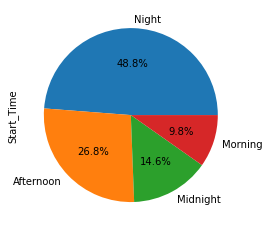

In [95]:
df_more_view['Start_Time'].value_counts().plot(kind = 'pie',autopct=lambda x: '%0.1f%%' % x)

Streamers with more viewers in holiday are most streamed at night, second in the afternoon.

In [97]:
df_more_view[['Duration','Duration_holi']].describe()

,Duration,Duration_holi
count,41.000000,41.000000
mean,6.829268,6.390244
std,3.527764,3.338248
min,1.000000,1.000000
25%,4.000000,3.000000
50%,6.000000,7.000000
75%,9.000000,9.000000
max,12.000000,12.000000


<AxesSubplot:ylabel='Donate_Scale_after_holi'>

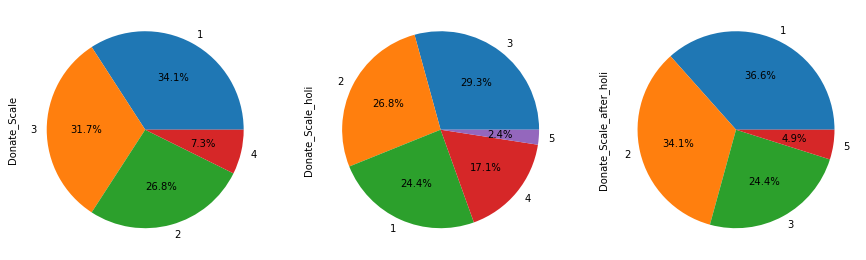

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df_more_view['Donate_Scale'].value_counts().plot(ax = axes[0], kind = 'pie',figsize=(15, 7),autopct=lambda x: '%0.1f%%' % x)
df_more_view['Donate_Scale_holi'].value_counts().plot(ax = axes[1],kind = 'pie',figsize=(15, 7),autopct=lambda x: '%0.1f%%' % x)
df_more_view['Donate_Scale_after_holi'].value_counts().plot(ax = axes[2],kind = 'pie',figsize=(15, 7),autopct=lambda x: '%0.1f%%' % x)

<AxesSubplot:ylabel='Chat/Sec_after_holi'>

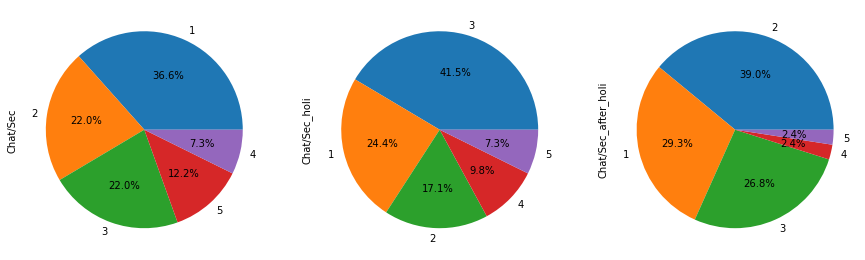

In [109]:
fig, axes = plt.subplots(nrows=1, ncols=3)

df_more_view['Chat/Sec'].value_counts().plot(ax = axes[0], kind = 'pie',figsize=(15, 7),autopct=lambda x: '%0.1f%%' % x)
df_more_view['Chat/Sec_holi'].value_counts().plot(ax = axes[1],kind = 'pie',figsize=(15, 7),autopct=lambda x: '%0.1f%%' % x)
df_more_view['Chat/Sec_after_holi'].value_counts().plot(ax = axes[2],kind = 'pie',figsize=(15, 7),autopct=lambda x: '%0.1f%%' % x)

Some Observations:

In [110]:
(df_more_view['Scale'].count())/len(df)

0.41

There are 41% streamers have more viewers in holiday.

In [112]:
len(df_more_view[df_more_view['Scale_after_holi']>= df_more_view['Scale_holi']])/len(df_more_view)

0.24390243902439024

In this 41% streamers, there are 24% streamers can retain their viewers after holiday.

In [113]:
len(df_more_view[df_more_view['Donate_Scale_holi']>= df_more_view['Donate_Scale']])/len(df_more_view)

0.6585365853658537

In this 41% streamers, there are 65.9% streamers earn more donate in holiday.

In [114]:
len(df_more_view[(df_more_view['Donate_Scale_holi']>= df_more_view['Donate_Scale']) & 
                (df_more_view['Donate_Scale_after_holi']>= df_more_view['Donate_Scale_holi'])])/len(df_more_view)

0.24390243902439024

In this 41% streamers, there are 24% streamers earn more donate in holiday and can earn at least the same in holiday.

In [115]:
len(df_more_view[df_more_view['Chat/Sec_holi']>= df_more_view['Chat/Sec']])/len(df_more_view)

0.6585365853658537

In this 41% streamers, there are 65.9% streamers' chat room has more chat in holiday.

In [116]:
len(df_more_view[(df_more_view['Chat/Sec_holi']>= df_more_view['Chat/Sec']) & 
                (df_more_view['Chat/Sec_after_holi']>= df_more_view['Chat/Sec_holi'])])/len(df_more_view)

0.2682926829268293

In this 41% streamers, there are 26.8% streamers' chat room has more chat in holiday and at least remain the same after holiday.

# Next, we move on to the analysis of each stream of some streamers

What can we analyze about?

1. What the viewers like/dislike about me?

We look at 3 aspects:
* viewers: viewers at each time, when does viewer number increase, when does it decrease
* donation: when does donation occur
* chat : when is chat room getting hot?

We random choose the data generated above and further generate data to answer the question.

In [117]:
streamer = rng.choice(99, 1)+1

In [118]:
streamer

array([88], dtype=int64)

In [120]:
df[df['StreamerID'] == int(streamer)]

,StreamerID,Scale,Start_Time,Duration,Donate_Scale,Chat/Sec,Scale_holi,Scale_after_holi,Duration_holi,Duration_after_holi,Donate_Scale_holi,Donate_Scale_after_holi,Chat/Sec_holi,Chat/Sec_after_holi
87,88,4,Morning,2,2,4,2,4,11,3,1,1,2,3


Stream before holiday

Viewer number (per minute)

In [122]:
df_streamer = pd.DataFrame(
{'Time_After_Start': range(1,121), 'Viewers': [0]* 120}
)

In [123]:
df_streamer

,Time_After_Start,Viewers
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
115,116,0
116,117,0
117,118,0
118,119,0


In [124]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

#L is responsible for scaling the output range from [0,1] to [0,L]
#b adds bias to the output and changes its range from [0,L] to [b,L+b]
#k is responsible for scaling the input, which remains in (-inf,inf)
#x0 is the point in the middle of the Sigmoid, 
#i.e. the point where Sigmoid should output the value L/2 [since if x=x0, we get 1/(1+exp(0)) = 1/2].

In [132]:
t = np.array([1,2,3,4,5,6,7,8,9,10])

In [137]:
num = np.rint(sigmoid(t, 2000 ,2, 1, 0)).astype(int)

In [138]:
num

array([ 538, 1000, 1462, 1762, 1905, 1964, 1987, 1995, 1998, 1999])

In [163]:
fluctuation = np.random.normal(20, 40, 120-len(num))

In [164]:
fluctuation

array([ 23.39097776, -29.48607504,  -1.234112  ,  37.66362525,
        51.14218815,  -1.5595135 ,  -4.95029274,  39.52235805,
        19.8916107 ,  10.5800631 ,  41.73639508,  19.46646792,
        21.90563672, -20.08792159,   0.8113012 ,   5.93136317,
       157.98759239,  32.4089853 , -14.83696109,  18.57433918,
        -4.00593075,  43.75216417,  60.02603009,  17.58050983,
       -31.1487149 ,   1.65753584, -14.45779197,  29.45403784,
        71.63554971,  49.21842491,  29.44295548,  -6.18642617,
       -24.71068299,  -4.63045511, -14.26503621,  16.14913771,
        48.05856451,  37.30656712,  32.19904798,  24.56284457,
       -85.9524936 ,  17.55353843,  -3.92980502,  17.89681995,
        82.96384013, -32.81821435,  15.54559505,  15.20811237,
       -21.29692217,   5.23052089,  30.50823033, -66.51657609,
       -12.96764097, -18.66189409,  -5.34779199,  96.77547656,
       -40.9994642 ,  -9.78268906,  62.6935396 ,   2.47468386,
        33.57364199,  32.80383108,  30.56186352,  28.47

In [144]:
from scipy.stats import poisson

In [168]:
rv = poisson.rvs(mu=200, size=10)

In [149]:
shock_time = rng.choice(100, 10)+10

In [150]:
shock_time

array([ 28, 108,  43,  85,  62,  10,  89,  50,  99,  10], dtype=int64)

In [169]:
for i in range(len(shock_time)):
    if i<3 : 
        fluctuation[shock_time[i]] += rv[i]
    else:
        fluctuation[shock_time[i]] -= rv[i]

In [170]:
fluctuation

array([  23.39097776,  -29.48607504,   -1.234112  ,   37.66362525,
         51.14218815,   -1.5595135 ,   -4.95029274,   39.52235805,
         19.8916107 ,   10.5800631 , -372.26360492,   19.46646792,
         21.90563672,  -20.08792159,    0.8113012 ,    5.93136317,
        157.98759239,   32.4089853 ,  -14.83696109,   18.57433918,
         -4.00593075,   43.75216417,   60.02603009,   17.58050983,
        -31.1487149 ,    1.65753584,  -14.45779197,   29.45403784,
        302.63554971,   49.21842491,   29.44295548,   -6.18642617,
        -24.71068299,   -4.63045511,  -14.26503621,   16.14913771,
         48.05856451,   37.30656712,   32.19904798,   24.56284457,
        -85.9524936 ,   17.55353843,   -3.92980502,  242.89681995,
         82.96384013,  -32.81821435,   15.54559505,   15.20811237,
        -21.29692217,    5.23052089, -219.49176967,  -66.51657609,
        -12.96764097,  -18.66189409,   -5.34779199,   96.77547656,
        -40.9994642 ,   -9.78268906,   62.6935396 ,    2.47468

In [173]:
total_fluc = num[-1] + fluctuation

In [176]:
viewer = np.concatenate((num,np.rint(total_fluc)),axis=0)

In [179]:
df_streamer['Viewers'] = viewer

In [180]:
df_streamer

,Time_After_Start,Viewers
0,1,538.0
1,2,1000.0
2,3,1462.0
3,4,1762.0
4,5,1905.0
...,...,...
115,116,2080.0
116,117,2004.0
117,118,1969.0
118,119,2365.0


In [181]:
donation_time = rng.choice(119, 40) +1
donation_num = rng.choice(50, 40,replace = True)+1

In [184]:
donation_average_value = [100]* 25 + [1000] * 10 + [10000] * 5

In [185]:
df_streamer['Donation_YN'] = 0
df_streamer['Donation_Number'] = 0
df_streamer['Donation_Average_Value'] = 0

In [186]:
df_streamer.loc[donation_time,'Donation_YN'] = 1

In [188]:
df_streamer.loc[donation_time,'Donation_Number'] = donation_num
df_streamer.loc[donation_time,'Donation_Average_Value'] = donation_average_value

In [189]:
df_streamer

,Time_After_Start,Viewers,Donation_YN,Donation_Number,Donation_Average_Value
0,1,538.0,0,0,0
1,2,1000.0,1,33,10000
2,3,1462.0,0,0,0
3,4,1762.0,1,19,100
4,5,1905.0,0,0,0
...,...,...,...,...,...
115,116,2080.0,1,34,1000
116,117,2004.0,0,0,0
117,118,1969.0,1,33,1000
118,119,2365.0,0,0,0


In [190]:
df_streamer['Chat/Minute'] = rng.choice(300, 120,replace = True) +1

In [192]:
df_streamer

,Time_After_Start,Viewers,Donation_YN,Donation_Number,Donation_Average_Value,Chat/Minute
0,1,538.0,0,0,0,92
1,2,1000.0,1,33,10000,134
2,3,1462.0,0,0,0,258
3,4,1762.0,1,19,100,193
4,5,1905.0,0,0,0,239
...,...,...,...,...,...,...
115,116,2080.0,1,34,1000,53
116,117,2004.0,0,0,0,249
117,118,1969.0,1,33,1000,155
118,119,2365.0,0,0,0,265


After generating data, we can analyze about the viewer of StreamerID = 88.

* High viewers & High Chat speed:

In [194]:
df_streamer[
    (df_streamer['Viewers'] >= df_streamer['Viewers'].median()) &
    (df_streamer['Chat/Minute'] >= df_streamer['Chat/Minute'].median())
]

,Time_After_Start,Viewers,Donation_YN,Donation_Number,Donation_Average_Value,Chat/Minute
10,11,2022.0,1,47,1000,217
13,14,2037.0,0,0,0,274
19,20,2010.0,1,19,100,206
21,22,2018.0,0,0,0,243
26,27,2157.0,0,0,0,228
33,34,2017.0,0,0,0,220
38,39,2302.0,0,0,0,233
39,40,2048.0,0,0,0,278
46,47,2047.0,0,0,0,176
47,48,2036.0,1,39,1000,200


## Question: In the case of high viewers and high chat speed, is there more donation than other cases?

In [195]:
df_streamer[
    (df_streamer['Viewers'] >= df_streamer['Viewers'].median()) &
    (df_streamer['Chat/Minute'] >= df_streamer['Chat/Minute'].median())
]['Donation_Number'].sum()/ df_streamer['Donation_Number'].sum()

0.2111111111111111

To answer this question, we classify the value higher than median as `high` and the value lower than median as `low`.

In [197]:
df_streamer['Viewer_High_low'] = df_streamer['Viewers'].apply(lambda x : 'High' if x>df_streamer['Viewers'].median() else 'Low')

In [199]:
df_streamer['Chat_High_low'] = df_streamer['Chat/Minute'].apply(lambda x : 'High' if x>df_streamer['Chat/Minute'].median() else 'Low')

In [201]:
pd.pivot_table(df_streamer, values='Donation_Number', index='Viewer_High_low', columns='Chat_High_low', aggfunc=sum)

Chat_High_low,High,Low
Viewer_High_low,,
High,171,284
Low,77,278


In this data, the higher viewers and high chat speed don't bring the most donation.

## Observations:

1. Viewer Numbers Peak Time

Definition of `Peak`: At least 5 viewers `High` in 10 minutes.\
Definition of `Trough`: No more than 5 vierwes `High` in 10 minutes.

In [205]:
df_streamer['High_Cumsum'] = df_streamer['Viewer_High_low'].map({'High':1,'Low':0}).rolling(10).sum()

In [207]:
df_streamer['Peak_YN'] = df_streamer['High_Cumsum'].apply(lambda x : 'Y' if x>4 else 'N')

In [210]:
df_streamer[df_streamer['Peak_YN'] == 'Y'].index

Int64Index([ 18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,
             31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  45,
             46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
             59,  60,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
             84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
             97,  98,  99, 100, 101, 102, 114, 115, 116, 117, 118, 119],
           dtype='int64')

Since in our definition, there are only `Peak` and `Trough` cases, so we can simply know when is `Trough` from the time of `Peak`.

## We can see what did this streamer do to analyze what content attracts viewers and what churns viewers.

## Similarly, we can analyze about chat engagement and donation willingness.

## Also, we can similarly analyze about the data at the time before holiday, at holiday and after holiday. 